In [1]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters

include("./utils/import.jl")
using .Import
using ..Import: State

include("./utils/figs.jl")
using .Figs

## Set Parameters
### Experiment Names

In [2]:
# y8_expID = "22914_23519"
# y9_expID = "22915_02260"
# y99_expID = "22915_095011"
# y999_expID = "22927_082018"

# exp_ID = "22105_173919"
# rand_B_ID = "base_rand_B_22105_180629"
# rand_all_ID = "base_rand_act_22105_18061"

exp_ID = "22107_153616"
rand_B_ID = "base_rand_B_22107_160713"
rand_all_ID = "base_rand_act_22107_160645"

"base_rand_act_22107_160645"

### Experiment Parameters

In [3]:
runs = 20
# actions = ["C1", "C2", "C3", "B1", "B2"]
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]

# y8, y9, y99, y999 = 0.8, 0.9, 0.99, 0.999
exp_name, rand_B_name, rand_all_name = "POMCPOW", "random Bs", "random actions"
;

### Plotting Parameters

In [34]:
window = 100

# y_labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"]
labels = [exp_name rand_B_name rand_all_name]
;

## Import Data

In [5]:
@time begin
    println("importing exp="*string(exp_name)*" (exp "*exp_ID*") data...")
    s, t, a, r, beliefs, final_states, avg_belief, avg_belief_u = Import.import_experiment(exp_ID, runs)
end;

importing exp=POMCPOW (exp 22107_153616) data...
187.342159 seconds (1.60 G allocations: 61.521 GiB, 4.48% gc time, 0.44% compilation time)


In [6]:
@time begin
    println("importing baseline exp="*string(rand_B_name)*" (exp "*rand_B_ID*") data...")
    B_s, B_t, B_a, B_r = Import.get_star(rand_B_ID, runs)
end;

importing baseline exp=random Bs (exp base_rand_B_22107_160713) data...
  0.018174 seconds (82.50 k allocations: 8.511 MiB, 14.68% compilation time)


In [7]:
@time begin
    println("importing baseline exp="*string(rand_all_name)*" (exp "*rand_all_ID*") data...")
    r_s, r_t, r_a, r_r = Import.get_star(rand_all_ID, runs)
end;

importing baseline exp=random actions (exp base_rand_act_22107_160645) data...
  0.012236 seconds (81.60 k allocations: 8.388 MiB)


In [8]:
# @time begin
#     println("importing y="*string(y8)*" (exp "*y8_expID*") data...")
#     y8_s, y8_t, y8_a, y8_r, y8_beliefs, y8_final_states, y8_avg_belief, y8_avg_belief_u = Import.import_experiment(y8_expID, runs)
# end;

In [9]:
# @time begin
#     println("importing y="*string(y9)*" (exp "*y9_expID*") data...")
#     y9_s, y9_t, y9_a, y9_r, y9_beliefs, y9_final_states, y9_avg_belief, y9_avg_belief_u = Import.import_experiment(y9_expID, runs)
# end;

In [10]:
# @time begin
#     println("importing y="*string(y99)*" (exp "*y99_expID*") data...")
#     y99_s, y99_t, y99_a, y99_r, y99_beliefs, y99_final_states, y99_avg_belief, y99_avg_belief_u = Import.import_experiment(y99_expID, runs)
# end;

In [11]:
# @time begin
#     println("importing y="*string(y999)*" (exp "*y999_expID*") data...")
#     y999_s, y999_t, y999_a, y999_r, y999_beliefs, y999_final_states, y999_avg_belief, y999_avg_belief_u = Import.import_experiment(y999_expID, runs)
# end;

## Analysis
### General

In [12]:
# for these experiments, all runs have the same start state & optimal action
optimal_action, highest_R = Import.get_optimal_arm(s[1])

println("State:")
println(string(s[1])*"\n")
println("Highest-Reward Arm:")
println(string(optimal_action))

println("\nExpected rewards\nC1:"*string(round(dot(s[1].u, s[1].d[1]); digits=2))*"\nC2:"*string(round(dot(s[1].u, s[1].d[2]); digits=2))*"\nC3:"*string(round(dot(s[1].u, s[1].d[3]); digits=2)))

State:
State([5.0, 3.3333333333333335, 0.0], Array{Float64}[[0.3333333333333333, 0.6666666666666666, 1.1102230246251565e-16], [0.16666666666666666, 0.3333333333333333, 0.5], [0.16666666666666666, 0.16666666666666666, 0.6666666666666667]], [0.0, 0.01, 50.0])

Highest-Reward Arm:
C1

Expected rewards
C1:3.89
C2:1.94
C3:1.39


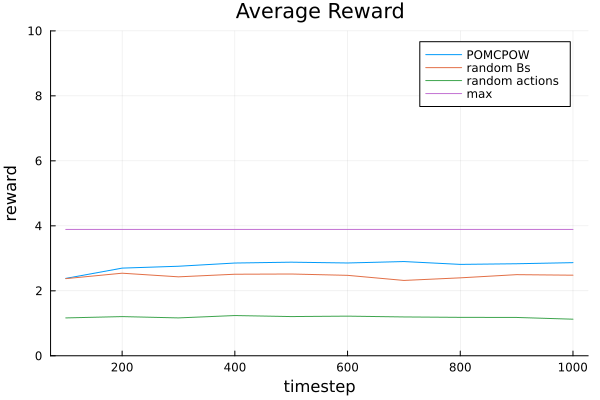

In [36]:
Figs.plot_avg_r_multiple_experiments([r, B_r, r_r], window, labels, "Average Reward", highest_R)

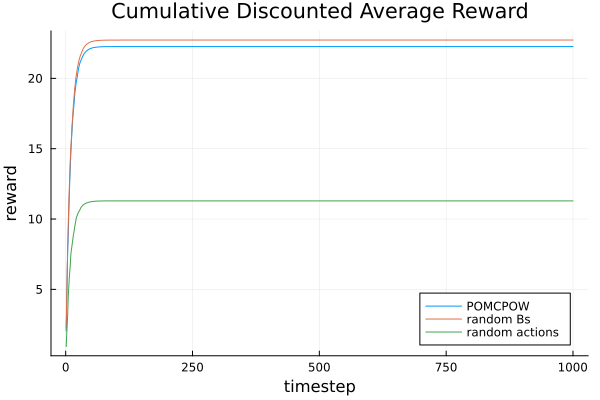

In [94]:
y = 0.9
Figs.plot_cumulative_avg_r_multiple_experiments([r, B_r, r_r], y, labels, "Cumulative Discounted Average Reward")

In [37]:
# Figs.plot_avg_r_multiple_experiments([y8_r, y9_r, y99_r, y999_r], window, y_labels, "Average Reward")

In [38]:
# uncomment to print histograms of first three actions

# println("\ny="*string(y8)*" Histograms (exp "*y8_expID*")")
# Import.print_action_hist(y8_a, actions)

# println("\ny="*string(y9)*" Histograms (exp "*y9_expID*")")
# Import.print_action_hist(y9_a, actions)

# println("\ny="*string(y99)*" Histograms (exp "*y99_expID*")")
# Import.print_action_hist(y99_a, actions)

# println("\ny="*string(y999)*" Histograms (exp "*y999_expID*")")
# Import.print_action_hist(y999_a, actions)

## Action Distributions

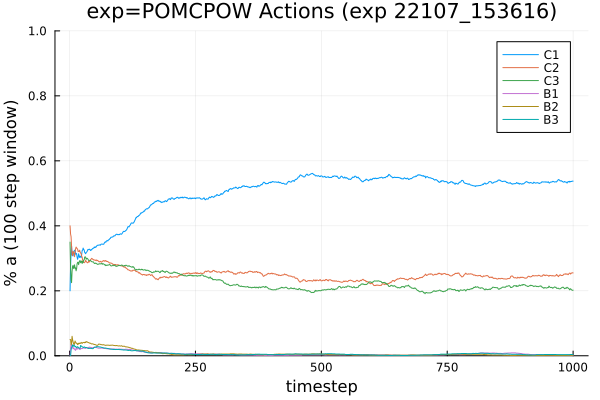

In [39]:
include("./utils/figs.jl")
using .Figs

Figs.plot_proportion_actions_all(a, actions, window, "exp="*exp_name*" Actions (exp "*exp_ID*")")

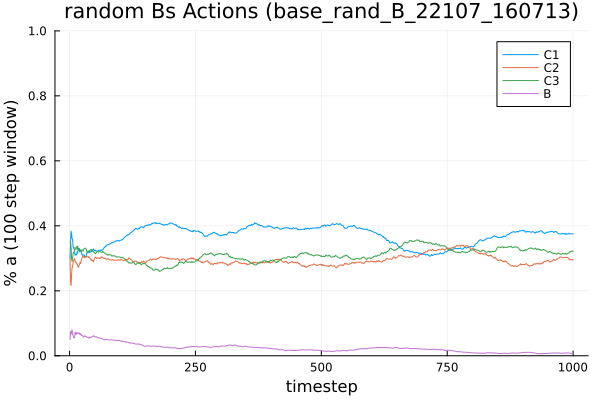

In [40]:
actions_single_teacher = ["C1", "C2", "C3", "B"]
Figs.plot_proportion_actions_all(B_a, actions_single_teacher, window, rand_B_name*" Actions ("*rand_B_ID*")")

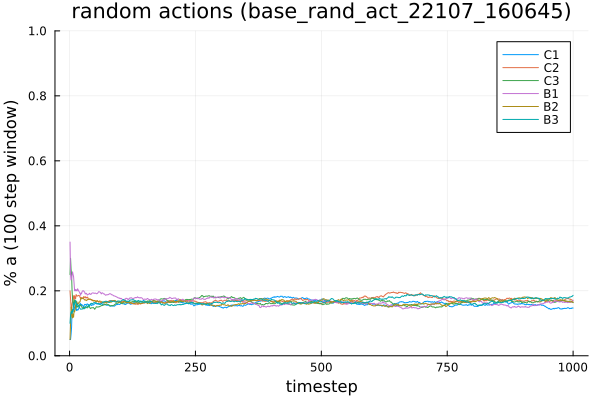

In [41]:
Figs.plot_proportion_actions_all(r_a, actions, window, rand_all_name*" ("*rand_all_ID*")")

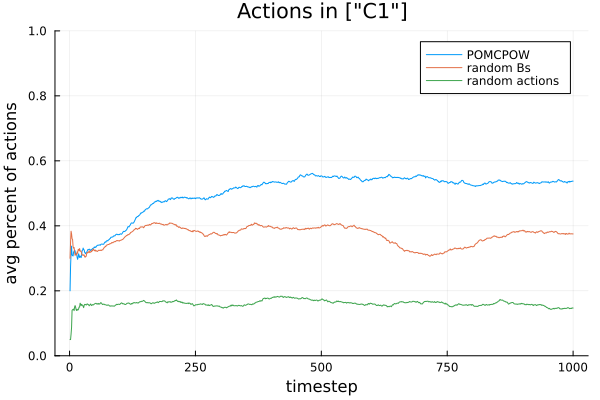

In [42]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a, B_a, r_a], ["C1"], window, labels, "Actions in ")

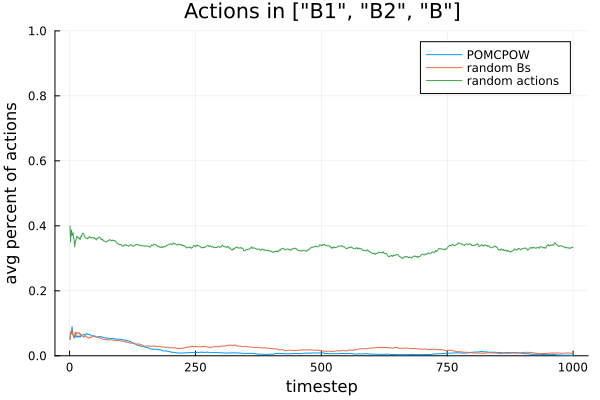

In [43]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a, B_a, r_a], ["B1", "B2", "B"], window, labels, "Actions in ")

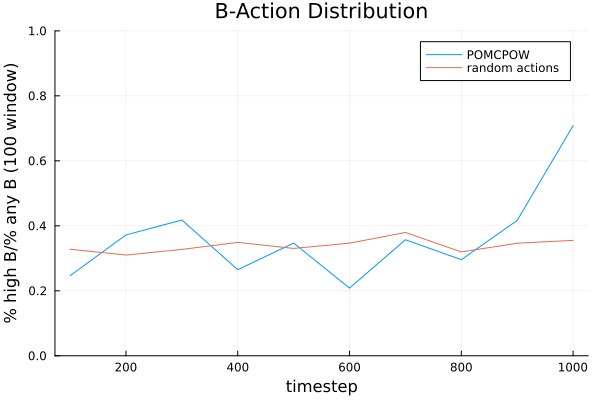

In [44]:
# proportion of actions that are high-B
Figs.plot_proportion_high_B([a, r_a], window, [labels[1] labels[3]], ["B3"], ["B1", "B2", "B3"], "B-Action Distribution")

In [45]:
# Figs.plot_proportion_actions_all(y8_a, actions, window, "y="*string(y8)*" Actions (exp "*y8_expID*")")

In [24]:
# Figs.plot_proportion_actions_all(y9_a, actions, window, "y="*string(y9)*" Actions (exp "*y9_expID*")")

In [25]:
# Figs.plot_proportion_actions_all(y99_a, actions, window, "y="*string(y99)*" Actions (exp "*y99_expID*")")

In [26]:
# Figs.plot_proportion_actions_all(y999_a, actions, window, "y="*string(y999)*" Actions (exp "*y999_expID*")")

In [27]:
# Figs.plot_actions_in_list_rolling_multiple_experiments([y8_a, y9_a, y99_a, y999_a], ["C1"], 100, y_labels, "Actions in ")

In [28]:
# Figs.plot_actions_in_list_rolling_multiple_experiments([y8_a, y9_a, y99_a, y999_a], ["B1", "B2"], 100, y_labels, "Actions in ")

In [29]:
# Figs.plot_actions_in_list_rolling_multiple_experiments([y8_a, y9_a, y99_a, y999_a], ["C1", "C2", "C3"], 100, y_labels, "Actions in ")

In [30]:
# # proportion of actions that are high-B
# include("./utils/figs.jl")
# using .Figs
# Figs.plot_proportion_high_B([y8_a, y9_a, y99_a, y999_a], window, y_labels, "B-Action Distribution")

## Belief Dynamics

In [31]:
plot(
    1:length(y8_avg_belief),
    [y8_avg_belief, y9_avg_belief, y99_avg_belief, y999_avg_belief],
    labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"],
    title = "belief on converged state",
    legend = :bottomright
)

LoadError: UndefVarError: y8_avg_belief not defined

In [32]:
function print_state(s::State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

true_state = y8_s[1]

println("\ntrue state")
print_state(true_state)

println("\ny=0.8 final states")
for s in y8_final_states
    println("")
    print_state(s)
end

println("\ny=0.9 final states")
for s in y9_final_states
    println("")
    print_state(s)
end

println("\ny=0.99 final states")
for s in y99_final_states
    println("")
    print_state(s)
end

println("\ny=0.999 final states")
for s in y999_final_states
    println("")
    print_state(s)
end


LoadError: UndefVarError: y8_s not defined

In [33]:
# NOTE: while these are almost identical, they do differ slightly
plot(
    1:length(y8_avg_belief),
    [y8_avg_belief_u, y9_avg_belief_u, y99_avg_belief_u, y999_avg_belief_u],
    labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"],
    title = "belief on converged utility function",
    legend = :bottomright
)

LoadError: UndefVarError: y8_avg_belief not defined